<h1  align="center"><b> Fake News Classifier <b></h1>
<h2 align="center"> Group 3: Sandhya Ratnam & Javier Perez </h2>

# **Overview**


The term "Fake News" has gained a lot of popularity within the past couple of years, especially with the 2016 and 2020 elections. It is becoming increasingly difficult to determine whether or not a news article is real. After learning about classification models, we decided it would be a nice challenge to try and create a classification model that could accurately classify a news article.

In this project, a fake news classifier will be created using four different models - Random Forest, KNN, Linear SVM, and Logistic Regression. There will be 3 datasets used. The first will be split into training and testing sets and will be used to train each model. The other two datasets will be used to evaluate how well the trained models work on different datasets. The business problem is to determine whether or not we can create a classification model that can accurately predict whether a news article is real or fake. 

# **Data**


The link in which the data is attained also provides more background on the data:
https://www.kaggle.com/hassanamin/textdb3

The head is checked to verify the data was imported correctly. There is a frivolous column called "Unnamed: 0" so it removed.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [ ]:
df = pd.read_csv('/content/drive/Shared drives/INET 4061 Project Group 3 /fake_or_real_news.csv') 

In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
# drop the first column 'Unnamed'
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# **Exploratory Data Analysis**

###**Data Information**

In [ ]:
df.shape

(6335, 3)

There are 6335 rows and 3 columns.

In [ ]:
df.isnull().any()

title    False
text     False
label    False
dtype: bool

There are no null values.

In [ ]:
df.describe()

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


No handles with labels found to put in legend.


Real Articles:  3171
Fake Articles:  3164


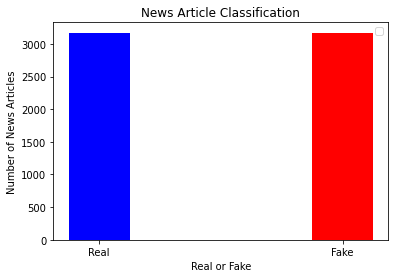

In [ ]:
trueNews = sum(df['label'] == 'REAL')
falseNews = sum(df['label'] == 'FAKE')

plt.bar('Real', trueNews, color = 'b', width = 0.25)
plt.bar('Fake', falseNews, color = 'r', width = 0.25)

#X = np.arange(1)
print("Real Articles: ",trueNews)
print("Fake Articles: ", falseNews)

plt.title("News Article Classification")
plt.xlabel("Real or Fake")
plt.ylabel("Number of News Articles")
plt.legend(loc='upper right')

The two classes, 'Real' and 'Fake', are balanced.

###**Data Preprocessing**

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re
from nltk.corpus import stopwords

In [ ]:
# Data Cleanup
# Source: https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794, Tyler Deutsch

def preprocess_text(x):
  # clean (convert to lowercase and remove punctuations and characters and then strip)
  text = re.sub('@[A-Za-z0–9]+', '', x) #Removing @mentions
  text = re.sub(r'[^\w\s]', '', str(text).lower().strip()) # Converts to lower case
  text = re.sub('#', '', text) # Removing '#' hash tag
  text = re.sub('RT[\s]+', '', text) # Removing RT
  text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
  text = re.sub('\n', '', text) # Removing newline
  text = re.sub(r'\([^)]*\)', "", text) # Removing parentheses
  text = re.sub(r'-', "", text) # Removing dash

  # Tokenize (convert from string to list)
  lst_text = text.split()

  # remove Stopwords
  stop_words = stopwords.words('english')
  lst_text = [word for word in lst_text if word not in stop_words]
          
  # Lemmatization (convert the word into root word)
  lem = nltk.stem.wordnet.WordNetLemmatizer()
  lst_text = [lem.lemmatize(word) for word in lst_text]
          
  # back to string from list
  text = " ".join(lst_text)
  return text

In [ ]:
df["cleaned_text"] = df["text"].apply(lambda x: preprocess_text(x))
df.head()

,title,text,label,cleaned_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,daniel greenfield shillman journalism fellow f...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,u secretary state john f kerry said monday sto...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,kaydee king november 9 2016 lesson tonight dem...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,primary day new york frontrunners hillary clin...


In this section, we cleaned up the data by removing punctuation and unnecessary characters from the data. We then tokenized it and removed all of the stopwords. Lemmatization was then performed to group together the different inflected forms of a word. The NLTK library, which is used for NLP, contains packages, like ‘stopwords’ and ‘wordnet’ , which were used for this filtering.

###**Word Clouds**

Word Clouds offer a visual representation of the frequency of words in the dataset. Most prominent words are larger in size in the visuals. This helps us gain a better understanding of the data that we are dealing with.

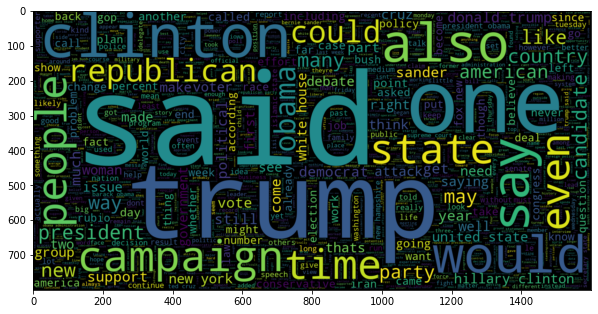

In [ ]:
from wordcloud import WordCloud

# Fake News
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords.words('english')).generate(" ".join(df[df.label == "REAL"].cleaned_text))
plt.imshow(wc , interpolation = 'bilinear')

In the dataset, there is a high frequency of several words in the 'REAL' articles. According to the Word Cloud, the most common words are 'Trump', 'one', 'said', and 'Clinton'. 

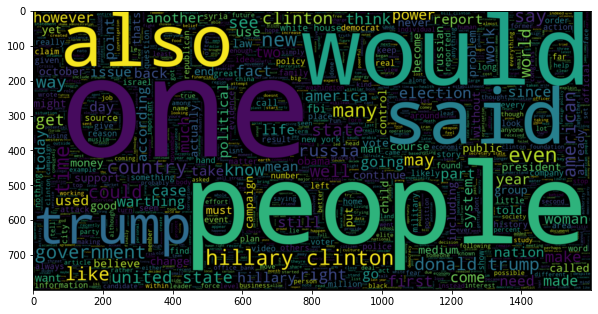

In [ ]:
# Real News
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords.words('english')).generate(" ".join(df[df.label == "FAKE"].cleaned_text))
plt.imshow(wc , interpolation = 'bilinear')

In the dataset, there is a high frequency of several words in the 'FAKE' articles. According to the Word Cloud, the most common words are 'one', 'people', 'said', and 'also'. In addition, 'Hillary', 'Clinton', and 'Trump' also have high frequencies.

Based on both of these Word Clouds, we can assume that a lot of the articles in the dataset are focused on politics and the 2016 presidential election due to the high frequency mention of the presidential candidates.

###**N-Grams**

N-Gram with an N value of 1 (Unigram) goes through and finds how frequent each word is and orders it. N-Gram with an N value of 2 (Bigram) goes through and groups up words with the word on its left and then with the word on its right forming two pairs each time. It then finds out how frequent these pairs of words are and orders them. N-Gram with an N value of 3 (Trigram) goes through and groups up words with the nearest two other words forming triads of words. It then finds the frequency of each triad and orders them.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

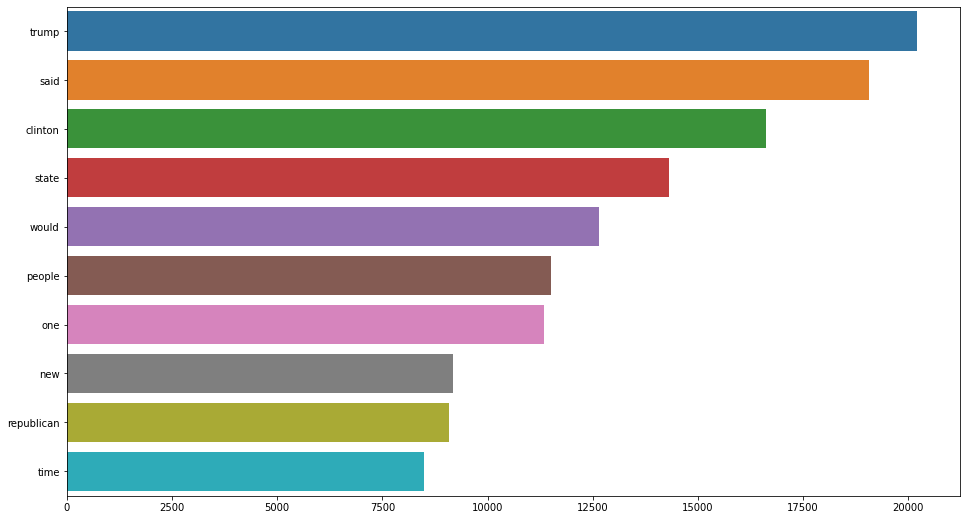

In [ ]:
# Unigram
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.cleaned_text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

From the Unigram, we can see that 'trump' is the most frequent word followed up by 'said', 'clinton', and 'state'.

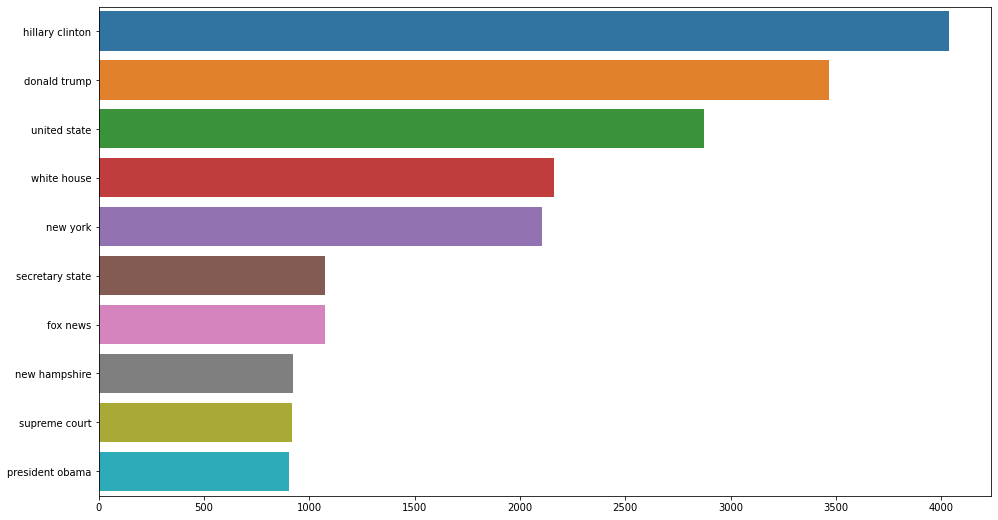

In [ ]:
# Bigram
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df.cleaned_text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

From the Bigram, we can see that 'hillary clinton' is the most frequent pair of words followed up by 'donald trump', 'united states', and 'white house'.

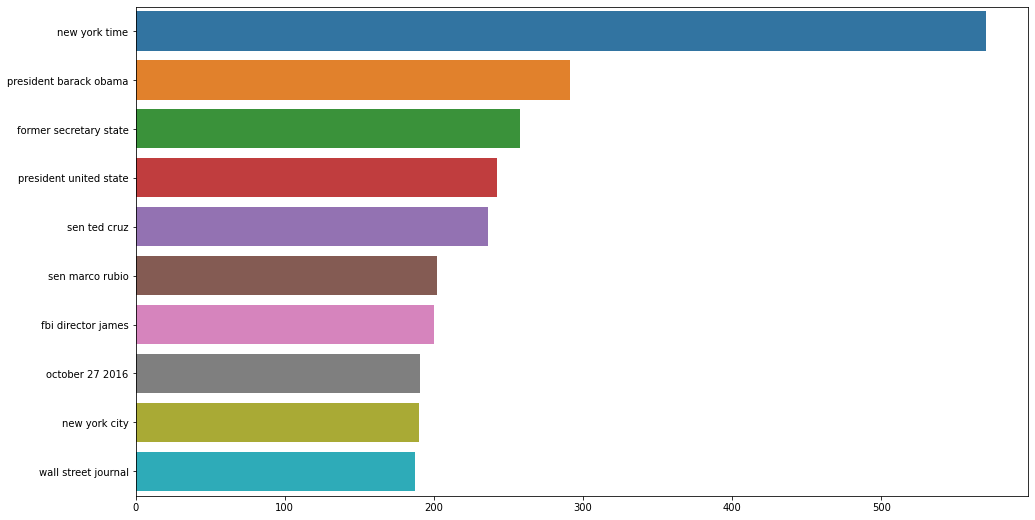

In [ ]:
# Trigram
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(df.cleaned_text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

From the Trigram, we can see that 'new york time' is the most frequent triade of words followed up by 'president barack obama', 'former secretary state', and 'president united state'.

Based on the N-Grams we can determine that the most frequent entities involve a politician that was active during the 2016 election. 

# **Models**

###**Split Data into Training and Testing Sets**

In [ ]:
df.label[df.label=='FAKE']=int(0)
df.label[df.label=='REAL']=int(1)
df = df.astype({"label": int})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         6335 non-null   object
 1   text          6335 non-null   object
 2   label         6335 non-null   int64 
 3   cleaned_text  6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'],df['label'],test_size=0.3,random_state=5)

In [ ]:
print(' X-Train Values: ', X_train.shape[0], '\n', 
     'X-Test Values: ', X_test.shape[0], '\n', 
     'Y-Train Values: ', y_train.shape[0], '\n', 
     'Y-Test Values: ', y_test.shape[0])

 X-Train Values:  4434 
 X-Test Values:  1901 
 Y-Train Values:  4434 
 Y-Test Values:  1901


4434 instances are allocated to the training set, and 1901 instances are allocated to the testing set.

Accuracy measures all of the correctly identified cases, while the F1-Score gives us a better measure of the incorrectly classified cases. For our case, we will focus on accuracy because we want to see if the articles are correctly classified or not. Accuracy makes more sense compared to F1-score because our target variables are balanced. However, the F1-Scores will also be calculated for comparison.

###**TFIDF and Count Vectorizer Function Declarations**

The TfidfVectorizer() and CountVectorizer() will be used to vectorize the data for each model, and the results for each vectorizer will be compared. CountVectorizer counts the word frequencies, so it returns ints, while TfidfVectorizer returns floats. The TF-IDF Vectorizer transforms the text into feature vectors to be used as an input into the estimator. The value increases proportionally to count, but it is inversely proportional to frequency of the word in the entity.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the data using tfidf
tfidf = TfidfVectorizer(max_df=0.7)
tfidf_train = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the data using countvectorizer
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [ ]:
# Classification Stats
def stats(y_pred, y_test):
  acc = metrics.accuracy_score(y_test, y_pred)
  f1 = metrics.f1_score(y_test, y_pred, average="weighted")
  print("Accuracy:", acc)
  print("\nConfusion Matrix:")
  print(metrics.confusion_matrix(y_test, y_pred),"\n")
  print(metrics.classification_report(y_test, y_pred))
  return acc, f1

In [ ]:
# Plot the data
def plot_vecs(tfidf_lst, count_lst):
  fig, ax = plt.subplots(figsize=(10,5))
  n_groups = 2
  index = np.arange(n_groups)
  bar_width = 0.35
  opacity = .7
  error_config = {'ecolor': '0.3'}
  tfidfv = ax.bar(index, tfidf_lst, bar_width, alpha=opacity, color='g', error_kw=error_config, label='TF-IDF Vectorizer')
  countv = ax.bar(index + bar_width, count_lst, bar_width, alpha=opacity, color='c', error_kw=error_config, label='Count Vectorizer')
  ax.set_ylabel('Accuracy/F1-Score')
  ax.set_title('Results')
  ax.legend()
  ax.set_xticks(index + bar_width / 2)
  ax.set_xticklabels((['Accuracy', 'F1-Score']))
  plt.show()

### Model Selection

The models we decided to train are Random Forest, KNN, Logistic Regression, and Linear SVM. 
- Random Forest because it is an ensemble method, so it combines multiple models into one.
- KNN because the target variable is balanced, there is no missing data, and it is easy to understand. 
- Logistic Regression because it works well with high dimensional data. 
- Linear SVM because unlike other classifiers, it uses a hyperplane to maximize the margin between two classes.

### Random Forest

Random Forest is an ensemble method that uses multiple decision trees on the training set and uses the tree that is the mode of all the trees.

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# TFIDF Vectorizer
rf.fit(tfidf_train, y_train)
rf_y_pred1 = rf.predict(tfidf_test)

In [ ]:
rf_acc1, rf_f11 = stats(rf_y_pred1, y_test)

Accuracy: 0.8963703314045239

Confusion Matrix:
[[841  94]
 [103 863]] 

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       935
           1       0.90      0.89      0.90       966

    accuracy                           0.90      1901
   macro avg       0.90      0.90      0.90      1901
weighted avg       0.90      0.90      0.90      1901



In [ ]:
# Count Vectorizer
rf.fit(count_train, y_train)
rf_y_pred2 = rf.predict(count_test)

In [ ]:
rf_acc2, rf_f12 = stats(y_test, rf_y_pred2)

Accuracy: 0.9005786428195687

Confusion Matrix:
[[848 102]
 [ 87 864]] 

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       950
           1       0.89      0.91      0.90       951

    accuracy                           0.90      1901
   macro avg       0.90      0.90      0.90      1901
weighted avg       0.90      0.90      0.90      1901



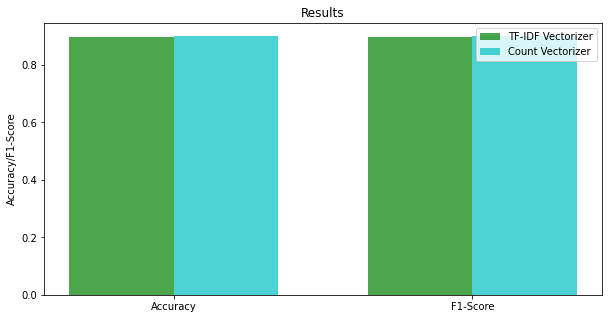

In [ ]:
plot_vecs([rf_acc1, rf_f11], [rf_acc2, rf_f12])

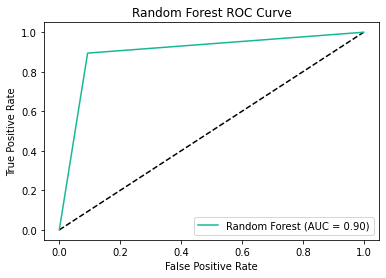

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred = rf.predict(count_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred) #y_test, y_pred
roc_auc = auc(fpr, tpr)
label='%s (AUC = %0.2f)' % ("Random Forest", roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=label, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

An AUC score of .90 means that there is a 90% chance that Random Forest classifies a news article as REAL or FAKE accurately.

The Random Forest ensemble learning method produces an accuracy and F1-Score of 0.89 using both Count Vectorizer and TF-IDF Vectorizer. However, Count Vectorizer is slightly more accuracte by a marginal amount. Overall, the scores for the random forest method are consistently good, but we should see if another model provides a better fit.

### K-Nearest Neighbor

This algorithm assumes that similar things exist in close proximity. It works by calculating the distances between a point and all the other points in the data. Then the algorithm selects a specified number, k, examples closest to the point, and votes for the most frequent label.

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761#:~:text=KNN%20works%20by%20finding%20the,in%20the%20case%20of%20regression

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# TFIDF Vectorizer
knn.fit(tfidf_train, y_train)
y_pred1 = knn.predict(tfidf_test)

In [ ]:
acc1, f11 = stats(y_test, y_pred1)

Accuracy: 0.533929510783798

Confusion Matrix:
[[935 886]
 [  0  80]] 

              precision    recall  f1-score   support

           0       1.00      0.51      0.68      1821
           1       0.08      1.00      0.15        80

    accuracy                           0.53      1901
   macro avg       0.54      0.76      0.42      1901
weighted avg       0.96      0.53      0.66      1901



In [ ]:
# Count Vectorizer
knn.fit(count_train, y_train)
y_pred2 = knn.predict(count_test)

In [ ]:
acc2, f12 = stats(y_test, y_pred2)

Accuracy: 0.7811678064176749

Confusion Matrix:
[[756 237]
 [179 729]] 

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       993
           1       0.75      0.80      0.78       908

    accuracy                           0.78      1901
   macro avg       0.78      0.78      0.78      1901
weighted avg       0.78      0.78      0.78      1901



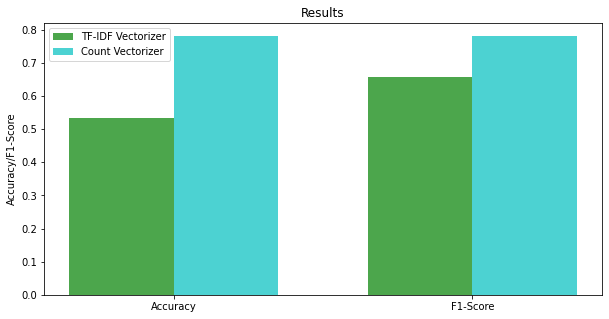

In [ ]:
plot_vecs([acc1, f11], [acc2, f12])

F-1 score is much higher than accuracy for TF-IDF Vectorizer which means the cost of false positives and false negatives in our dataset are very different when using the KNN with tf-idf vectorizer.

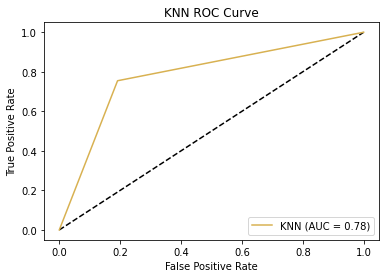

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred = knn.predict(count_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred) #y_test, y_pred
roc_auc = auc(fpr, tpr)
label='%s (AUC = %0.2f)' % ("KNN", roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=label, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()

An AUC score of .78 means that there is a 78% chance that KNN classifies a news article as REAL or FAKE accurately.

The KNN classifier, with 5 neighbors, produces a higher accuracy and F1-Score for the Count Vectorizer, 0.78, compared to the those of the Count Vectorizer. The accuracy of the KNN model using Count Vectorizer is 0.53, and the weighted F1-score is 0.66. This is shown by the blue bars being having higher scores than the green bars on the plot above. Overall, the scores for the KNN model are good, but we should see if we can achieve better results with another model. It's interesting how the F1-Score is quite higher than the accuracy when using the TF-IDF Vectorizer

### Logistic Regression


In this case, logistic regression can be used because we have a binary classification (REAL or FAKE).

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 5000)

# TFIDF Vectorizer
lr.fit(tfidf_train, y_train)
lr_y_pred1 = lr.predict(tfidf_test)

In [ ]:
lr_acc1, lr_f11 = stats(y_test, lr_y_pred1)

Accuracy: 0.9147816938453446

Confusion Matrix:
[[879 106]
 [ 56 860]] 

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       985
           1       0.89      0.94      0.91       916

    accuracy                           0.91      1901
   macro avg       0.92      0.92      0.91      1901
weighted avg       0.92      0.91      0.91      1901



In [ ]:
# Count Vectorizer
lr.fit(count_train, y_train)
lr_y_pred2 = lr.predict(count_test)

In [ ]:
lr_acc2, lr_f12 = stats(y_test, lr_y_pred2)

Accuracy: 0.9068911099421357

Confusion Matrix:
[[854  96]
 [ 81 870]] 

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       950
           1       0.90      0.91      0.91       951

    accuracy                           0.91      1901
   macro avg       0.91      0.91      0.91      1901
weighted avg       0.91      0.91      0.91      1901



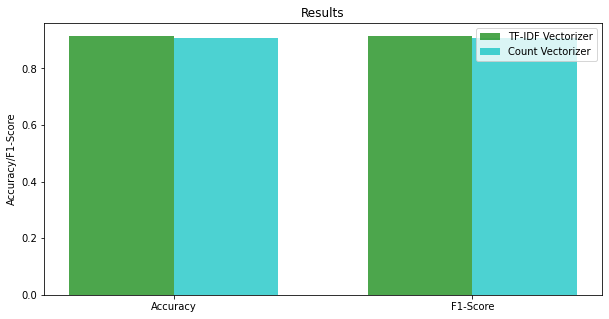

In [ ]:
plot_vecs([lr_acc1, lr_f11], [lr_acc2, lr_f12])

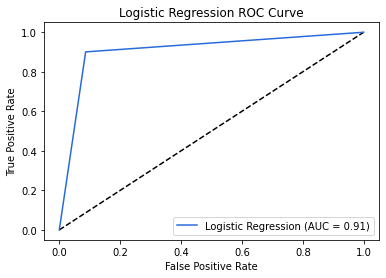

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred = lr.predict(count_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred) #y_test, y_pred
roc_auc = auc(fpr, tpr)
label='%s (AUC = %0.2f)' % ("Logistic Regression", roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=label, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

An AUC score of .91 means that there is a 91% chance that Logistic Regression classifies a news article as REAL or FAKE accurately. This is the highest so far.

Logistic Regression performed similarly to random forest but, slightly better. In this case, the TF-IDF Vectorizer beformed better with an accuracy of .914 compared to Count Vectorizer having an accuracy of .907. So far it is the best classifier. We will look at Linear Support Vector Machines next.

### Linear Support Vector Machine

Linear Support Vector Machine (SVM) works by creating a hyperplane to separate the classes and maximize the margin. 

In [ ]:
from sklearn import svm

lsvm = svm.SVC(kernel='linear') # Linear Kernel

# TFIDF Vectorizer
lsvm.fit(tfidf_train, y_train)
y_pred3 = lsvm.predict(tfidf_test)

In [ ]:
acc3, f13 = stats(y_test, y_pred3)

Accuracy: 0.932140978432404

Confusion Matrix:
[[874  68]
 [ 61 898]] 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       942
           1       0.93      0.94      0.93       959

    accuracy                           0.93      1901
   macro avg       0.93      0.93      0.93      1901
weighted avg       0.93      0.93      0.93      1901



In [ ]:
# Count Vectorizer
lsvm.fit(count_train, y_train)
y_pred4 = lsvm.predict(count_test)

In [ ]:
acc4, f14 = stats(y_test, y_pred4)

Accuracy: 0.8584955286691215

Confusion Matrix:
[[800 134]
 [135 832]] 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       934
           1       0.86      0.86      0.86       967

    accuracy                           0.86      1901
   macro avg       0.86      0.86      0.86      1901
weighted avg       0.86      0.86      0.86      1901



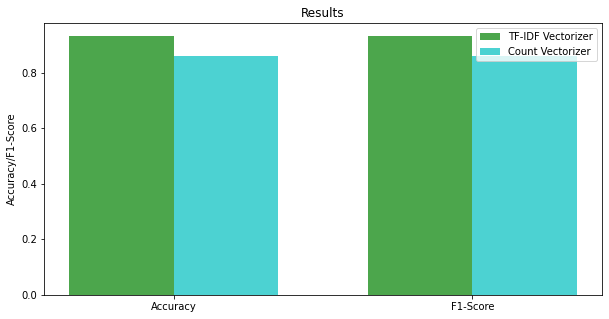

In [ ]:
plot_vecs([acc3, f13], [acc4, f14])

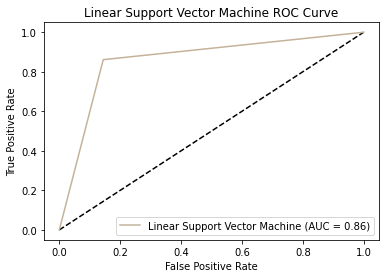

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred = lsvm.predict(count_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred) #y_test, y_pred
roc_auc = auc(fpr, tpr)
label='%s (AUC = %0.2f)' % ("Linear Support Vector Machine", roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=label, color=np.random.rand(3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear Support Vector Machine ROC Curve')
plt.legend(loc="lower right")
plt.show()

An AUC score of .86 means that there is a 86% chance that Linear Support Vector Machine classifies a news article as REAL or FAKE accurately.

The SVM classifier produces a higher accuracy and F1-Score for the TF-IDF Vectorizer, 0.93, compared to those of the Count Vectorizer, 0.86. This is shown by the green bars being having higher scores than the blue bars on the plot above. SVM, compared to the other classification models, has the highest accuracy and F1-score.

# **Models Evaluation**

In [ ]:
# Plot the data
def plot2(accuracy_lst, f1score_lst):
  #print(accuracy_lst)
  #print(f1score_lst)
  fig, ax = plt.subplots(figsize=(15,10))
  n_groups = 4
  index = np.arange(n_groups)
  bar_width = 0.35
  opacity = .7
  error_config = {'ecolor': '0.3'}
  accuracy = ax.bar(index, accuracy_lst, bar_width, alpha=opacity, color='g', error_kw=error_config, label='Accuracy')
  f1 = ax.bar(index + bar_width, f1score_lst, bar_width, alpha=opacity, color='c', error_kw=error_config, label='F1-Score')

  ax.set_xlabel('Models')
  ax.set_ylabel('Accuracy/F1-Score')
  ax.set_title('Results')
  ax.legend()
  ax.set_xticks(index + bar_width / 2)
  ax.set_xticklabels((['Random Forest', 'KNN', 'Logistic Regression', 'SVM']))
  plt.show()

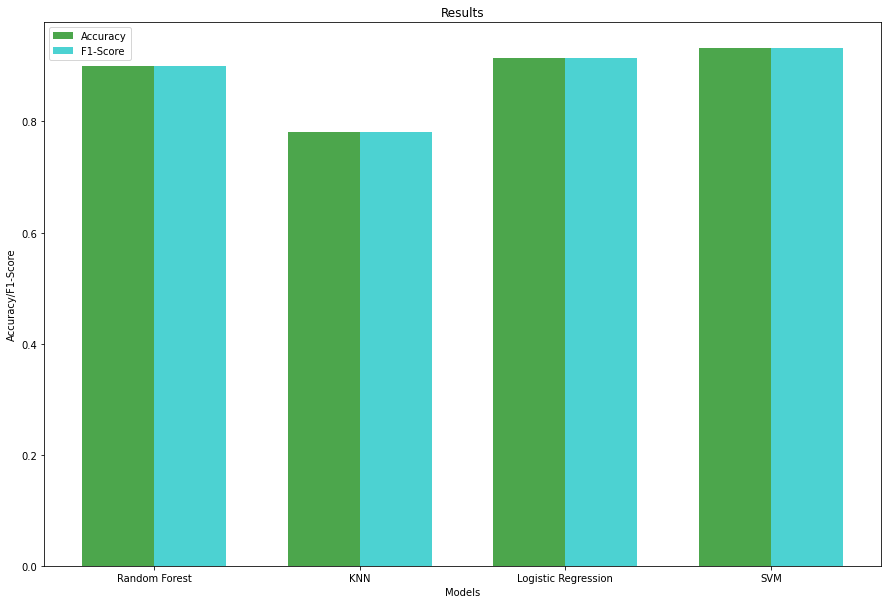

In [ ]:
plot2([rf_acc2, acc2, lr_acc1, acc3], [rf_f12, f12, lr_f11, f13])
accuracylst_init = [rf_acc2, acc2, lr_acc1, acc3]

In this plot, Random Forest is using Count Vectorizer and so is KNN. Logistic Regression and Linear SVM are both using is TF-IDF Vectorizer. This is because Count Vectorizer produced a higher accuracy for Random Forest and KNN, while TF-IDF Vectorizer produced a higher accuracy for Logistic Regression and SVM. From this we can see that SVM has the highest accuracy and F1-score (~90%) compared to the other three models. KNN has the lowest accuracy and F1-score (less than 80%) by a significant amount. 

# **Additional Test Set (Dataset 2)**

This dataset is much larger than the original dataset and will be used to evaluate how well the model is fitting the data. This dataset is also heavily focused on politics.

###**Data**

In [ ]:
# Datasets taken from https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

dfFake = pd.read_csv('/content/drive/Shared drives/INET 4061 Project Group 3 /Fake.csv') 
dfReal = pd.read_csv('/content/drive/Shared drives/INET 4061 Project Group 3 /True.csv') 

In [ ]:
# drop some columns and add a column
dfReal.drop('date',axis=1,inplace=True)
dfReal.drop('subject',axis=1,inplace=True)
dfReal['label'] = 'REAL'
dfReal.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,REAL
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,REAL
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,REAL
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,REAL
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,REAL


In [ ]:
# drop some columns and add a column
dfFake.drop('date',axis=1,inplace=True)
dfFake.drop('subject',axis=1,inplace=True)
dfFake['label'] = 'FAKE'
dfFake.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,FAKE


In [ ]:
# combine and verify
dfNew = pd.concat([dfReal, dfFake], axis=0)
dfNew = dfNew.sample(frac=1)

In [ ]:
dfNew["cleaned_text"] = dfNew["text"].apply(lambda x: preprocess_text(x))
dfNew.head()

,title,text,label,cleaned_text
18058,Five suspected al Qaeda militants killed in Ye...,DUBAI (Reuters) - Five suspected al Qaeda mili...,REAL,dubai reuters five suspected al qaeda militant...
15964,“DIRTY JOBS” HOST MIKE ROWE Absolutely Destroy...,Dirty Jobs host Mike Rowe went off on a guy ...,FAKE,dirty job host mike rowe went guy claimed rowe...
16065,PRESIDENT TRUMP’S REMARKS at Ford’s Theatre Ga...,PRESIDENT TRUMP and FIRST LADY MELANIA TRUMP a...,FAKE,president trump first lady melania trump atten...
9845,"Regional crises, not human rights, to dominate...",RIYADH (Reuters) - U.S. President Barack Obama...,REAL,riyadh reuters u president barack obama aired ...
3071,George Clooney HAMMERS Trump For Insulting Me...,George Clooney is tired of Donald Trump s obse...,FAKE,george clooney tired donald trump obsession at...


###**EDA**

In [ ]:
dfNew.shape

(44898, 4)

In [ ]:
dfNew.isnull().any()

title           False
text            False
label           False
cleaned_text    False
dtype: bool

No handles with labels found to put in legend.


True Articles:  21417
Fake Articles:  23481


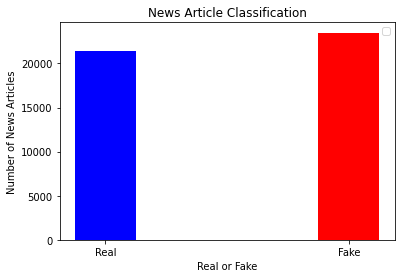

In [ ]:
trueNews = sum(dfNew['label'] == 'REAL')
falseNews = sum(dfNew['label'] == 'FAKE')

plt.bar('Real', trueNews, color = 'b', width = 0.25)
plt.bar('Fake', falseNews, color = 'r', width = 0.25)

#X = np.arange(1)
print("True Articles: ",trueNews)
print("Fake Articles: ", falseNews)

plt.title("News Article Classification")
plt.xlabel("Real or Fake")
plt.ylabel("Number of News Articles")
plt.legend(loc='upper right')

The two classes are pretty balanced, even though there is a slightly higher number of fake news articles.

In [ ]:
dfNew.label[dfNew.label=='FAKE']=int(0)
dfNew.label[dfNew.label=='REAL']=int(1)
dfNew = dfNew.astype({"label": int})

In [ ]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 18058 to 1070
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         44898 non-null  object
 1   text          44898 non-null  object
 2   label         44898 non-null  int64 
 3   cleaned_text  44898 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


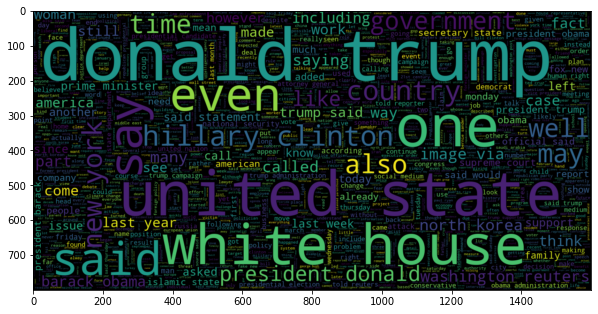

In [ ]:
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords.words('english')).generate(" ".join(dfNew.cleaned_text))
plt.imshow(wc , interpolation = 'bilinear')

This dataset is also very politically focused like the original dataset with common words like "trump" and "clinton".

###**Models**

In [ ]:
X_trainNew, X_testNew, y_trainNew, y_testNew = train_test_split(dfNew['cleaned_text'], dfNew['label'], test_size=.999,
random_state=4061)

In [ ]:
count_testNew = count_vectorizer.transform(X_testNew) #X_test
tfidf_testNew = tfidf.transform(X_testNew) #X_test
accuracylst = []

In [ ]:
rf.fit(count_train, y_train)
newPred = rf.predict(count_testNew)

print("Random Forest Count Vectorizer Accuracy: ", metrics.accuracy_score(y_testNew, newPred))

rf.fit(tfidf_train, y_train)
newPred = rf.predict(tfidf_testNew)

print("Random Forest TF-IDF Vectorizer Accuracy: ", metrics.accuracy_score(y_testNew, newPred))
accuracylst.append(metrics.accuracy_score(y_testNew, newPred))

Random Forest Count Vectorizer Accuracy:  0.6295536629954965
Random Forest TF-IDF Vectorizer Accuracy:  0.6655593704017478


In [ ]:
knn.fit(count_train, y_train)
newPred = knn.predict(count_testNew)

print("KNN Count Vectorizer Accuracy: ", metrics.accuracy_score(y_testNew, newPred))
accuracylst.append(metrics.accuracy_score(y_testNew, newPred))

knn.fit(tfidf_train, y_train)
newPred = knn.predict(tfidf_testNew)

print("KNN TF-IDF Vectorizer Accuracy: ", metrics.accuracy_score(y_testNew, newPred))

KNN Count Vectorizer Accuracy:  0.6247380389708833
KNN TF-IDF Vectorizer Accuracy:  0.5236991126766843


In [ ]:
lr.fit(count_train, y_train)
newPred = lr.predict(count_testNew)

print("Logistic Regression Count Vectorizer Accuracy: ", metrics.accuracy_score(y_testNew, newPred))

lr.fit(tfidf_train, y_train)
newPred = lr.predict(tfidf_testNew)

print("Logistic Regression TF-IDF Vectorizer Accuracy: ", metrics.accuracy_score(y_testNew, newPred))
accuracylst.append(metrics.accuracy_score(y_testNew, newPred))

Logistic Regression Count Vectorizer Accuracy:  0.6700851652026575
Logistic Regression TF-IDF Vectorizer Accuracy:  0.6906184509742721


In [ ]:
lsvm.fit(count_train, y_train)
newPred = lsvm.predict(count_testNew)

print("SVM Count Vectorizer Accuracy: ", metrics.accuracy_score(y_testNew, newPred))

lsvm.fit(tfidf_train, y_train)
newPred = lsvm.predict(tfidf_testNew)

print("SVM TF-IDF Vectorizer Accuracy: ", metrics.accuracy_score(y_testNew, newPred))
accuracylst.append(metrics.accuracy_score(y_testNew, newPred))

SVM Count Vectorizer Accuracy:  0.637646586703527
SVM TF-IDF Vectorizer Accuracy:  0.6773308957952467


For each of the 4 models, we will use the highest accuracy between the TFIDF and Count Vectorizer to plot. KNN was the only model with Count Vectorizer having a larger accuracy. There was a 10% difference between the accuracies for the model, which is quite high. The rest of the 3 models had a higher accuracy with the TF-IDF Vectorizer with a difference of around 2-4 between the two accuracies.

###**Evaluation**

In [ ]:
# Plot the data
def plot3(accuracy_lst):
  fig, ax = plt.subplots(figsize=(15,7))
  n_groups = 4
  index = np.arange(n_groups)
  bar_width = 0.5
  opacity = .7
  error_config = {'ecolor': '0.3'}
  accuracy = ax.bar(index, accuracy_lst, bar_width, alpha=opacity, color='g', error_kw=error_config)

  ax.set_xlabel('Model')
  ax.set_ylabel('Accuracy')
  ax.set_title('Results')
  ax.set_xticks(index + (bar_width/2)-.25)
  ax.set_xticklabels((['Random Forest', 'KNN', 'Logistic Regression', 'SVM']))
  plt.show()

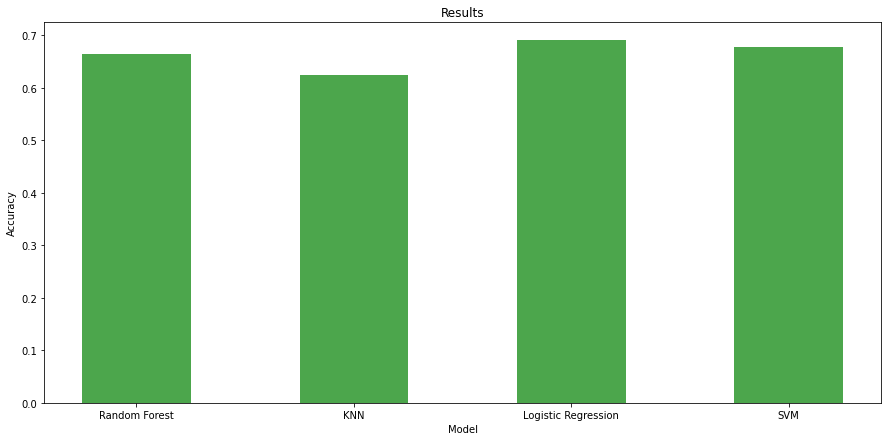

In [ ]:
plot3(accuracylst)

All of the models have accuracies between 60% and 70%. Logistic regression performs the best with 69% accuracy, while KNN performs the worst with 62% accuracy.

# **Additional Test Set (Dataset 3)**

This dataset contains news articles from various domains including technology, business, entertainment, and politics. This will help us evaluate how well our models work on datasets that aren't mostly focused on political news.

###**Data**

In [ ]:
# Data taken from https://www.kaggle.com/sumanthvrao/fakenewsdataset
dftemp1 = pd.read_csv('/content/drive/Shared drives/INET 4061 Project Group 3 /CatalogRealArticles.csv') 
dftemp1['label'] = 'REAL'
dftemp1 = dftemp1[["Title", "Article", "label"]]
dftemp1 = dftemp1.dropna()

dftemp2 = pd.read_csv('/content/drive/Shared drives/INET 4061 Project Group 3 /CatalogFakeArticles.csv')
dftemp2['label'] = 'FAKE'
dftemp2 = dftemp2[["Title", "Article", "label"]]
dftemp2 = dftemp2.dropna()

df2 = pd.concat([dftemp1, dftemp2], axis=0)
df2.head(5)

,Title,Article,label
0,Message in grain field in N Dakota,Believe it or not….\n\nIf you fly a plane this...,REAL
1,Best Buy has announced they will be using “Hap...,"Dawn Bryant, a spokeswoman at Best Buy Co. Inc...",REAL
2,Roald Dahl Wrote This Painful Plea For Vaccina...,Author Roald Dahl penned a heartbreaking lette...,REAL
3,Ramnit Computer Worm Compromises 45K Facebook ...,A computer worm that has traditionally targete...,REAL
4,Brothers gored in Pamplona have no regrets,Two American brothers ran with the bulls in Pa...,REAL


In [ ]:
df2["cleaned_text"] = df2["Article"].apply(lambda x: preprocess_text(x))
df2.head()

,Title,Article,label,cleaned_text
0,Message in grain field in N Dakota,Believe it or not….\n\nIf you fly a plane this...,REAL,believe notif fly plane statement worth look g...
1,Best Buy has announced they will be using “Hap...,"Dawn Bryant, a spokeswoman at Best Buy Co. Inc...",REAL,dawn bryant spokeswoman best buy co inc say ad...
2,Roald Dahl Wrote This Painful Plea For Vaccina...,Author Roald Dahl penned a heartbreaking lette...,REAL,author roald dahl penned heartbreaking letter ...
3,Ramnit Computer Worm Compromises 45K Facebook ...,A computer worm that has traditionally targete...,REAL,computer worm traditionally targeted financial...
4,Brothers gored in Pamplona have no regrets,Two American brothers ran with the bulls in Pa...,REAL,two american brother ran bull pamplona wound p...


###**EDA**

In [ ]:
df2.shape

(99, 4)

In [ ]:
df2.isnull().any()

Title           False
Article         False
label           False
cleaned_text    False
dtype: bool

No handles with labels found to put in legend.


Real Articles:  49
Fake Articles:  50


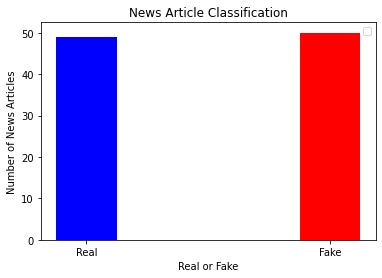

In [ ]:
trueNews = sum(df2['label'] == 'REAL')
falseNews = sum(df2['label'] == 'FAKE')

plt.bar('Real', trueNews, color = 'b', width = 0.25)
plt.bar('Fake', falseNews, color = 'r', width = 0.25)

print("Real Articles: ",trueNews)
print("Fake Articles: ", falseNews)

plt.title("News Article Classification")
plt.xlabel("Real or Fake")
plt.ylabel("Number of News Articles")
plt.legend(loc='upper right')

In [ ]:
df2.label[df2.label=='FAKE']=int(0)
df2.label[df2.label=='REAL']=int(1)
df2 = df2.astype({"label": int})

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         99 non-null     object
 1   Article       99 non-null     object
 2   label         99 non-null     int64 
 3   cleaned_text  99 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.9+ KB


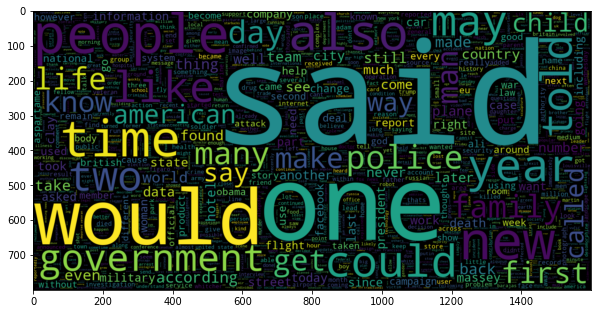

In [ ]:
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords.words('english')).generate(" ".join(df2.cleaned_text))
plt.imshow(wc , interpolation = 'bilinear')

Based on this word cloud, this dataset is very different in terms of the articles included compared to the previous two datasets. Words with high frequencies include "people", "time", and "year".

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2['cleaned_text'], df2['label'], test_size=.98,
random_state=4061)

###**Models**

In [ ]:
count_test2 = count_vectorizer.transform(X_test2) #X_test
tfidf_test2 = tfidf.transform(X_test2) #X_test
accuracylst2 = []

In [ ]:
rf.fit(count_train, y_train)
newPred1 = rf.predict(count_test2)
print("Random Forest Count Vectorizer Accuracy: ", metrics.accuracy_score(y_test2, newPred1))
accuracylst2.append(metrics.accuracy_score(y_test2, newPred1))

rf.fit(tfidf_train, y_train)
newPred2 = rf.predict(tfidf_test2)
print("Random Forest TF-IDF Vectorizer Accuracy: ", metrics.accuracy_score(y_test2, newPred2))

Random Forest Count Vectorizer Accuracy:  0.6122448979591837
Random Forest TF-IDF Vectorizer Accuracy:  0.5816326530612245


In [ ]:
knn.fit(count_train, y_train)
newPred1 = knn.predict(count_test2)
print("KNN Count Vectorizer Accuracy: ", metrics.accuracy_score(y_test2, newPred1))
accuracylst2.append(metrics.accuracy_score(y_test2, newPred1))

knn.fit(tfidf_train, y_train)
newPred2 = knn.predict(tfidf_test2)
print("KNN TF-IDF Vectorizer Accuracy: ", metrics.accuracy_score(y_test2, newPred2))

KNN Count Vectorizer Accuracy:  0.6224489795918368
KNN TF-IDF Vectorizer Accuracy:  0.5


In [ ]:
lr.fit(count_train, y_train)
newPred1 = lr.predict(count_test2)
print("Logistic Regression Count Vectorizer Accuracy: ", metrics.accuracy_score(y_test2, newPred1))
accuracylst2.append(metrics.accuracy_score(y_test2, newPred1))

lr.fit(tfidf_train, y_train)
newPred2 = lr.predict(tfidf_test2)
print("Logistic Regression TF-IDF Vectorizer Accuracy: ", metrics.accuracy_score(y_test2, newPred2))

Logistic Regression Count Vectorizer Accuracy:  0.6020408163265306
Logistic Regression TF-IDF Vectorizer Accuracy:  0.5306122448979592


In [ ]:
lsvm.fit(count_train, y_train)
newPred1 = lsvm.predict(count_test2)
print("SVM Count Vectorizer Accuracy: ", metrics.accuracy_score(y_test2, newPred1))
accuracylst2.append(metrics.accuracy_score(y_test2, newPred1))

lsvm.fit(tfidf_train, y_train)
newPred2 = lsvm.predict(tfidf_test2)
print("SVM Vectorizer Accuracy: ", metrics.accuracy_score(y_test2, newPred2))

SVM Count Vectorizer Accuracy:  0.6428571428571429
SVM Vectorizer Accuracy:  0.5612244897959183


For all of the 4 models, Count Vectorizer had a higher accuracy than the TFIDF Vectorizer, ranging from about 3% to 8% higher. Therefore, the accuracies associated with the Count Vectorizer for each model will be used for analysis.

###**Evaluation**

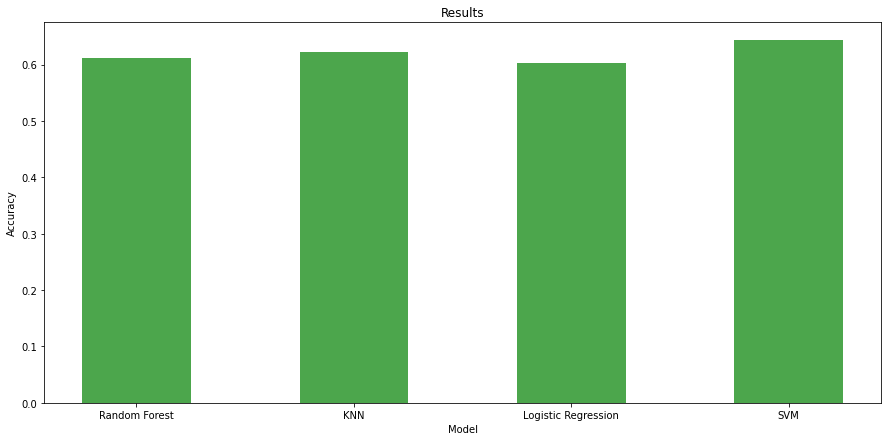

In [ ]:
plot3(accuracylst2)

All of the accuraries are around 60% for each of the models. Linear SVM performs the best with 64% accuracy and then KNN with 62% accuracy. Random Forest and Logistic Regression are around 61% and 60% accuracy, respectively.

# **Comparison of the 3 Datasets**

In [ ]:
# Plot the data
def plot4(accuracy_lst1, accuracy_lst2, accuracy_lst3):
  fig, ax = plt.subplots(figsize=(15,10))
  n_groups = 4
  index = np.arange(n_groups)
  bar_width = 0.25
  opacity = .7
  error_config = {'ecolor': '0.3'}
  dataset1 = ax.bar(index, accuracy_lst1, bar_width, alpha=opacity, color='g', error_kw=error_config, label='Dataset 1')
  dataset2 = ax.bar(index + bar_width, accuracy_lst2, bar_width, alpha=opacity, color='b', error_kw=error_config, label='Dataset 2')
  dataset3 = ax.bar(index + 2*bar_width, accuracy_lst3, bar_width, alpha=opacity, color='c', error_kw=error_config, label='Dataset 3')

  ax.set_xlabel('Model')
  ax.set_ylabel('Accuracy')
  ax.set_title('Accuracies of Models')
  ax.legend()
  ax.set_xticks(index + (bar_width / 2)+.125)
  ax.set_xticklabels((['Random Forest', 'KNN', 'Logistic Regression', 'SVM']))
  plt.show()

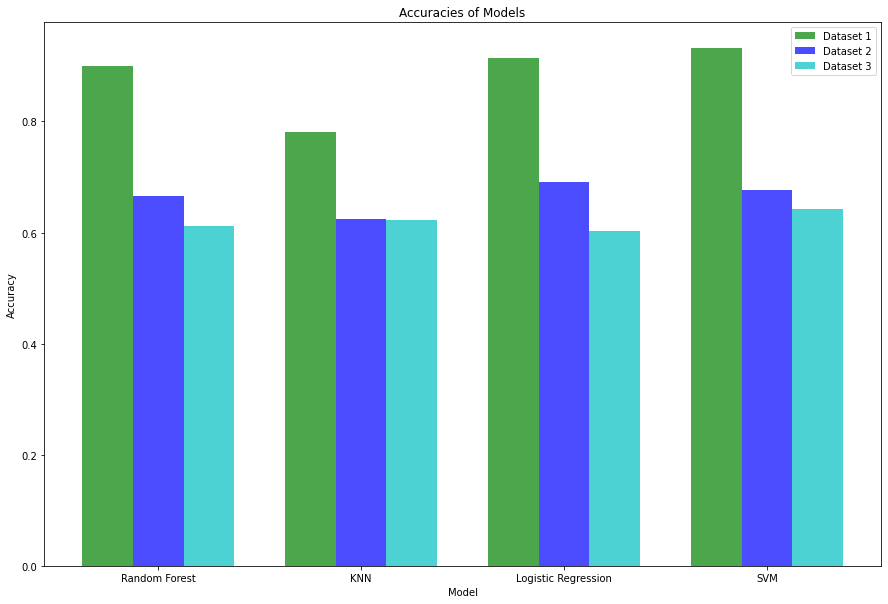

In [ ]:
plot4(accuracylst_init, accuracylst, accuracylst2)

Based on these results, we can see that our models are heavily overfitting on the original dataset. Dataset 2 has higher accuracies than Dataset 3, which makes sense since the articles are more politically focused like in the original dataset. SVM provides the best accuracy with the original dataset. The Linear SVM model performs the best overall because even though it is overfitting on the original dataset, Dataset 2 has second highest accuracy with SVM, and Dataset 3 has the highest accuracy with SVM. 

# **Conclusion**

The business problem was to determine whether or not we can create a classification model that can accurately predict whether a news article is real or fake. We were able to do this with about 60%-70% accuracy. 

Dataset 2, like the original dataset, was politically focused so you would assume our models would perform similarly on both of them but, this wasn't the case. The size of this dataset was much greater than the original dataset. Dataset 2 performed significantly worse than the original dataset. It performed similarly to Dataset 3, which didn't have a political focus. This led us to believe that the overfitting wasn't being caused by the original dataset being politically focused. Perhaps it was being caused by our original data set being too small, written by similar authors, or other reasons that we can pinpoint. Overall, linear SVM performed the best because it had the second highest accuracy on Dataset 2 and highest accuracy of Dataset 3. Using these new datasets allows us to see how much the models are overfitting on the original dataset.

If we had more time in the future we would have tried to find a larger data set full of news articles that don't focus on one topic specifically. This new data set would have been used to train our models. We hypothesize this would reduce overfitting. In addition, trying out more models, like Naive Bayes, could improve the accuracy as well.